# COGS 108 - Final Project

# Overview
My project explores the effect of workload on the evaluations of health inspectors. I want to tackle the issue that despite the works of health inspectors, there are still many reports of food-borne illness in many communities. Therefore, I will be using the dataset that includes the inspections of inspectors in North Carolina from 2012-2016. I analyzed the dataset by grouping the workload into months, and using OLS regression from patsy and sm and polyfit from NumPy to make predictions and see if there is a correlation between workload and evaulations.

# Names & GitHub Username

- Name: Tommy Tran
- GH: tommytran-8

# Research Question

Could the frequency in inspection visits that a health inspector is required to do in a month have an affect on the evaulation of restaurants in communities? Do evaulations become less meticulousness and more lenient if assigned more visits in a month?

## Background and Prior Work

Although health inspections are a means of ensuring clean and hygienic communities in our food industry, there still exist the problem of food-borne illness caused by these communities. In the article by Maria R. Ibanez and Michael W. Toffel, they state that "Food-borne illness affects an estimated 48 million Americans each year, resulting in 3,000 deaths and the hospitalization of 128,000 people, according to the Centers for Disease Control and Prevention (CDC)" [1]. Such a problem is not easily solvable, however, there are ways in which we could tackle the process to lessen the problem. One such way is to less the workload that are required of the health inspectors. Allowing them the time to make more accurate and better evaulations of restuarants will ensure that the restuarants need to make more hygienic and healthy choices. As stated by Maria R. Ibanez and Michael W. Toffel, "We noticed that inspectors tended to cite fewer violations at each successive establishment they visited through their day — suggesting that the onerous work takes a toll on their meticulousness" [1]. Inspectors are given too much work and are expected to always give accurate evaulations of healthy practices; such a demand is impossible. The article by Carmen Nobel supports this as he explains that, "On average, inspectors cited fewer violations at each successive establishment inspected throughout the day, the researchers found. In other words, inspectors tended to find and report the most violations at the first place they inspected and the fewest violations at the last place." [2]. Too many restuarants are going unnoticed during inspections and thus are causing health risks in many communities in the food industry.



Therefore, if inspectors are to be given less work daily, it would definitely have a positive effect on the inspection process effectiveness. As stated in the article, "If we are able to halve the daily schedule effects (which erode scrutiny) and increase by 50% the outcome effects (which increase scrutiny), we estimate that citations would increase by 5.5%, which translates to nearly 127,000 more violations detected each year. We estimate that this would result in 10 million fewer food poisoning cases and nearly 27,000 fewer food-related emergency room trips." [1]


References (include links):
- 1) https://hbr.org/2019/05/to-improve-food-inspections-change-the-way-theyre-scheduled
- 2) https://www.forbes.com/sites/hbsworkingknowledge/2018/05/16/a-simple-way-for-restaurant-inspectors-to-improve-food-safety/#4c2e139b123f

# Hypothesis


To improve the restuarant health inspection process in communities, it would likely improve the judgment of restaurants and improve health standards if the frequency that inspectors are required to monthly is reduced while also hiring more inspectors to cover the work.

# DataSet(s)

- Dataset Name: inspections.csv
- Link to the dataset: N/A, recieved from COGS108 canvas website
- Number of observations: 18466 rows and 36 columns
- Variables I will use: inspector_id, date, score
- Other variables: hsisid, name, address1, address2, city, state, postalcode, phonenumber, restaurantopendate, days_from_open_date, facilitytype, x, y, geocodestatus, zip, type, description, inspectedby, inspection_num, previous_inspection_date, days_since_previous_inspection, previous_inspection_by_same _inspector, num_critical, num_non_critical, num_critical_previous, num_non_critical_previous, num_critical_mean_previous,	num_non_critical_mean_previous, avg_neighbor_num_critical, avg_neighbor_num_non_critical, top_match, second_match, critical.

The dataset consists of scraping from the North Carolina Health inspection department. It is a record of the inspections of various facilities in North Carolina by a total of 32 inspectors. It spans from 2012 to 2016.

# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import patsy
import statsmodels.api as sm

# Data Cleaning

#### Reading in the dataset

In [2]:
df = pd.read_csv("inspections.csv")
df


,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,5959-1108 Triangle Town Blv,NaN,raleigh,NC,27616,(919) 792-2499,2002-08-19T00:00:00Z,...,13,1.0,4.0,1.000000,4.777778,4.692525,9.863838,4.092022e+09,4.092017e+09,1
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,1000 Olde Weatherstone Way,NaN,cary,NC,27513,(919) 380-6985,1995-09-05T00:00:00Z,...,3,2.0,5.0,0.750000,3.250000,5.853333,5.972381,4.092013e+09,4.092016e+09,1
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,11555 GREEN LEVEL CHURCH RD,NaN,cary,NC,27519,NaN,2009-11-13T00:00:00Z,...,4,0.0,2.0,0.875000,1.750000,2.466667,3.000000,4.092017e+09,4.092015e+09,1
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,7971 FAYETTEVILLE RD,NaN,raleigh,NC,27603-5631,(919) 772-0317,2000-07-01T00:00:00Z,...,2,0.0,3.0,1.111111,2.000000,3.737302,4.606349,4.092016e+09,4.092015e+09,1


#### Looking at the variables of the dataset and identifying that is necessary for my question and hypothesis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18466 entries, 0 to 18465
Data columns (total 36 columns):
hsisid                                   18466 non-null int64
date                                     18466 non-null object
name                                     18466 non-null object
address1                                 18466 non-null object
address2                                 1895 non-null object
city                                     18466 non-null object
state                                    18466 non-null object
postalcode                               18466 non-null object
phonenumber                              17965 non-null object
restaurantopendate                       18466 non-null object
days_from_open_date                      18466 non-null int64
facilitytype                             18466 non-null object
x                                        18466 non-null float64
y                                        18466 non-null float64
geocodesta

##### Checking whether there are any inspections outside of common region (NC).

In [4]:
df['state'].unique()

array(['NC'], dtype=object)

#### Data privacy and cleaning dataset
Only kept inspector_id, date, and score since I need a dataset that tells me the scores that inspectors give to a resturant and the amount of work they had during each month.

In [5]:
df = df[['inspector_id', 'date', 'score']]
df = df.sort_values(by=['inspector_id', 'date'])
df = df.reset_index(drop=True)
df.head()

,inspector_id,date,score
0,1.0,2012-09-24T00:00:00Z,93.5
1,1.0,2012-09-25T00:00:00Z,99.0
2,1.0,2012-09-26T00:00:00Z,99.0
3,1.0,2012-09-26T00:00:00Z,96.5
4,1.0,2012-09-27T00:00:00Z,97.0


#### Checking the number of inspectors in dataset

In [6]:
df['inspector_id'].unique().shape

(32,)

#### Removing any nulls in column of inspector_id

In [7]:
df.isnull().any(axis=0)

inspector_id     True
date            False
score           False
dtype: bool

In [8]:
df = df[df['inspector_id'].notna()]
df = df.reset_index(drop=True)
df.isnull().any(axis=0)

inspector_id    False
date            False
score           False
dtype: bool

#### Looking at dataset after changes

In [9]:
df.shape

(18461, 3)

In [10]:
df.head()

,inspector_id,date,score
0,1.0,2012-09-24T00:00:00Z,93.5
1,1.0,2012-09-25T00:00:00Z,99.0
2,1.0,2012-09-26T00:00:00Z,99.0
3,1.0,2012-09-26T00:00:00Z,96.5
4,1.0,2012-09-27T00:00:00Z,97.0


#### Changing the dates to only being dates consisting of year and month
I also will change the dates to only year and month since I will be looking at the effects of monthly workload. 

In [11]:
def monthly(date):
    return date[:7]
df['date'] = df['date'].apply(monthly)
df['date'].unique()

array(['2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02',
       '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08',
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
       '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
       '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
       '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-11'], dtype=object)

#### Reorganize the dataset to group each inspector with their dates
I took all the respective inspectors and dates and got the average scores given by the inspectors during each month they worked and the amount of inspections they had in each month

In [12]:
df['inspector_id'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 31., 32.])

In [13]:
dfnew = df.groupby(['inspector_id', 'date']).agg({'score' : ['mean', 'count']})
dfnew

score      
                           mean count
inspector_id date                    
1.0          2012-09  97.166667     6
             2012-10  96.185185    27
             2012-11  95.947368    19
             2012-12  97.000000    22
             2013-01  95.955882    34
...                         ...   ...
32.0         2013-04  96.666667    21
             2013-05  96.681818    11
             2013-06  94.954545    22
             2013-07  97.175000    20
             2013-08  95.027778    18

[996 rows x 2 columns]

In [14]:
dfnew = dfnew.rename(columns = {'mean' : 'Avg_Score', 'count': 'Num_of_Inspection'})

In [15]:
dfnew.reset_index(level=0, inplace=True)

#### Reorganized the new dataframe so it is usable for analysis.

In [16]:
dfnew['Avg_Score'] = dfnew['score']['Avg_Score']
dfnew['Num_of_Inspection']= dfnew['score']['Num_of_Inspection']
dfnew = dfnew.drop(columns=['score'])
dfnew = dfnew.reset_index()

In [17]:
dfnew

,date,inspector_id,Avg_Score,Num_of_Inspection
,,,,
0,2012-09,1.0,97.166667,6
1,2012-10,1.0,96.185185,27
2,2012-11,1.0,95.947368,19
3,2012-12,1.0,97.000000,22
4,2013-01,1.0,95.955882,34
...,...,...,...,...
991,2013-04,32.0,96.666667,21
992,2013-05,32.0,96.681818,11
993,2013-06,32.0,94.954545,22


# Data Visualization

#### Figure 1 is a graph that represents the scorings gave by each inspector and how much work they had in making those scores in each month.
Here each line (the x axis) represents each inspector. We can observe when required less work (the blue colors), each inspector has more varying scores, while the gray scores had more clumped scores by each inspector.

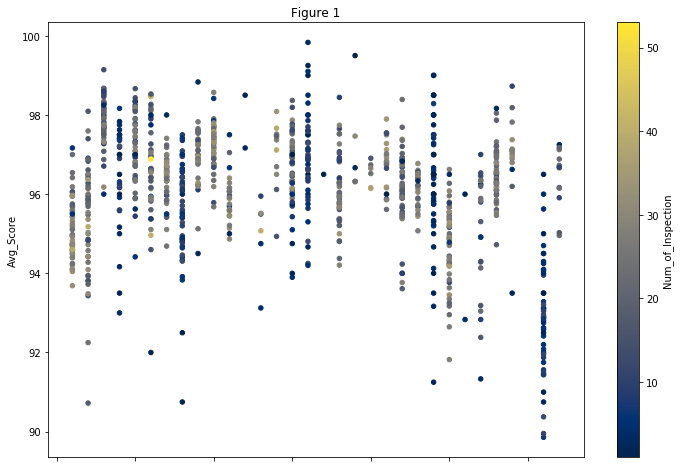

In [18]:
plt = dfnew.plot.scatter(x= 'inspector_id', y = 'Avg_Score', c = 'Num_of_Inspection', colormap = 'cividis', figsize=(12,8), title="Figure 1")

#### Relooking at the data, I noticed that inspector 17 only had 1 evaluation in her career. Therefore, I concluded that their data is unnecessary and decided to remove it.

In [19]:
dfnew[dfnew['inspector_id'] == 17]

,date,inspector_id,Avg_Score,Num_of_Inspection
,,,,
592,2012-09,17.0,96.5,1


In [20]:
dfnew[dfnew['inspector_id'] == 17].shape
# i will drop this inspector since just evaulating only 1 facility is not relevant

(1, 4)

In [21]:
dfnew = dfnew.drop(index=592)

#### When looking at figure one, I wanted to understand each inspector's evaluations more carefully, so I decided make a graph for each individual and look at the relation between their workload and evaulation. I see more clearly that when inspectors are required less work, their scores varied, while more work had more clumps.

Figure 2


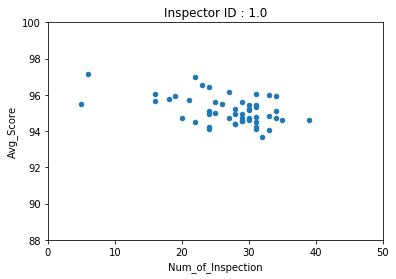

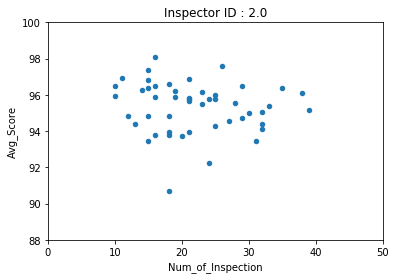

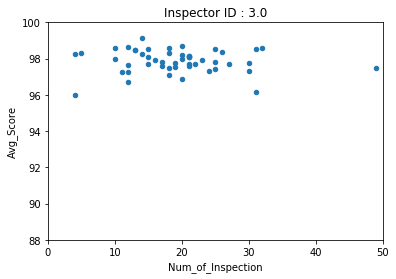

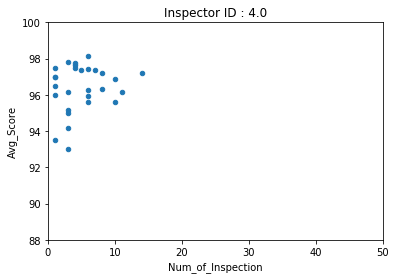

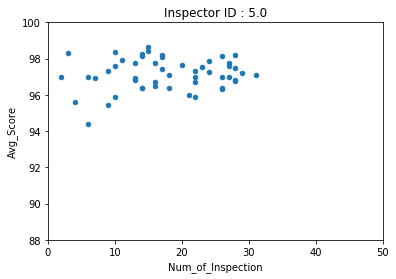

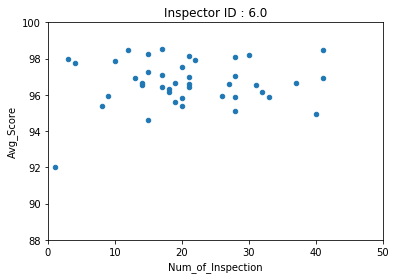

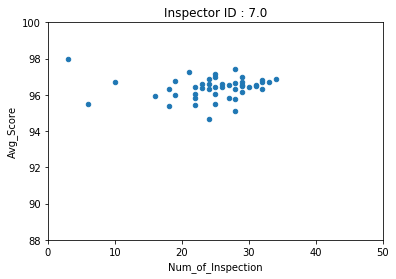

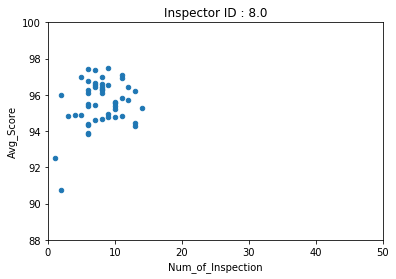

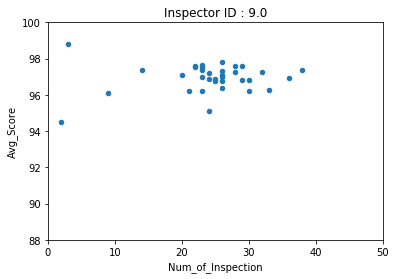

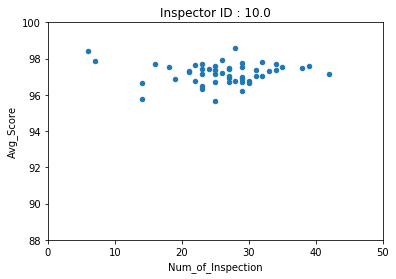

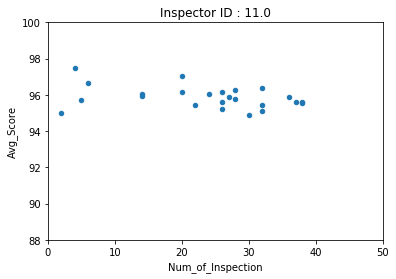

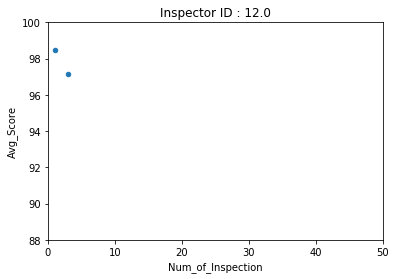

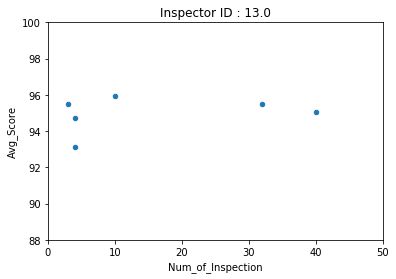

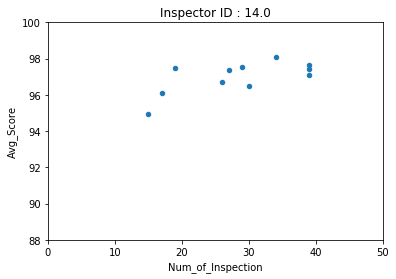

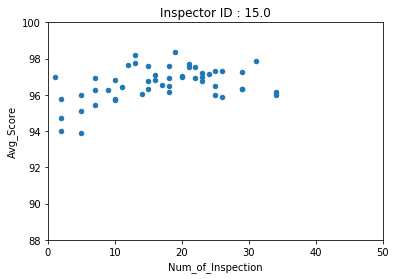

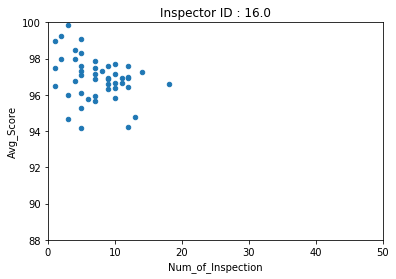

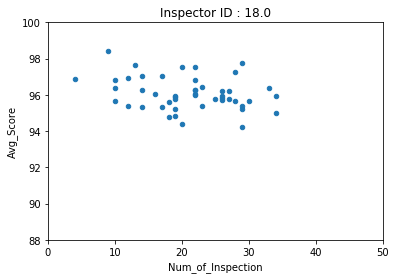

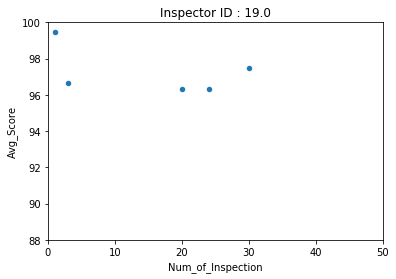

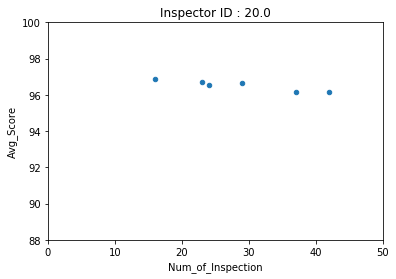

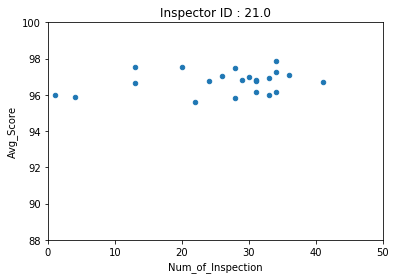

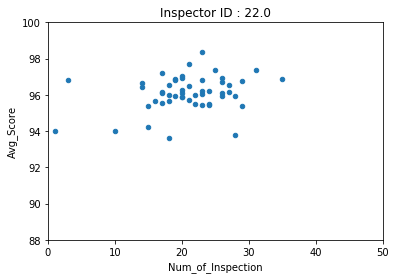

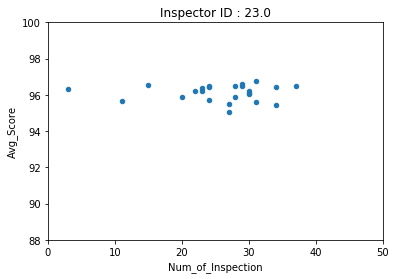

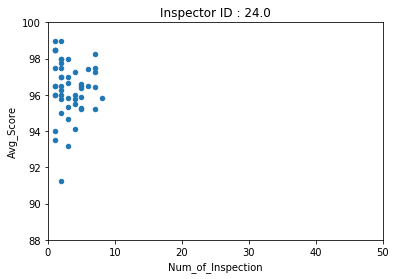

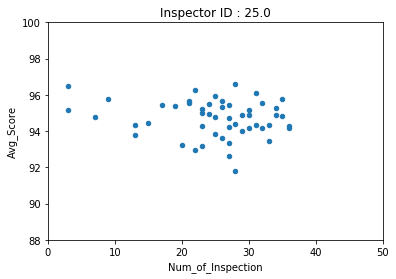

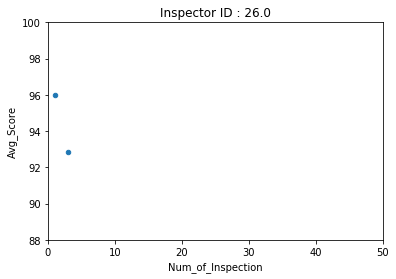

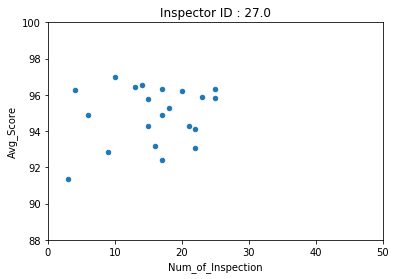

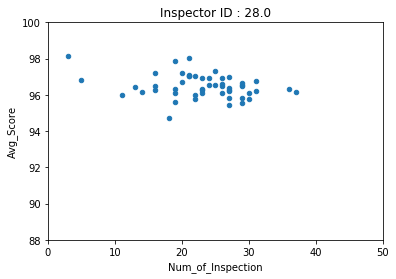

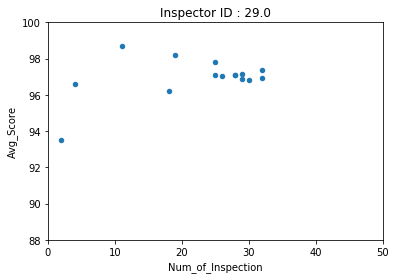

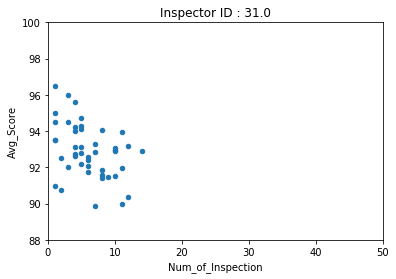

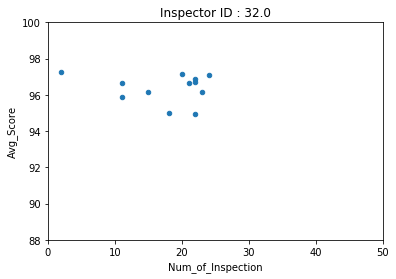

In [22]:
#Now I should try to look at the inspections individually
print('Figure 2')
for i in dfnew['inspector_id'].unique():
    dftemp = dfnew[dfnew['inspector_id'] == i].squeeze()
    temptitle = "%s%s" % ("Inspector ID : ", i) 
    dftemp.plot.scatter(x = 'Num_of_Inspection', y = 'Avg_Score', title=temptitle,xlim=(0,50), ylim=(88,100))

# Data Analysis & Results
#### Here I want to analyze and produce a predictive model that could to predict scores if given specific numbers of inspections in a month

In [23]:
a1, b1 = np.polyfit(dfnew['Num_of_Inspection'], dfnew['Avg_Score'],1)
pred_score = np.arange(0,51)
for ind,value in enumerate(pred_score):
    pred_score[ind] = a1 * pred_score[ind] + b1
pred_score


array([95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96])

Figure 3


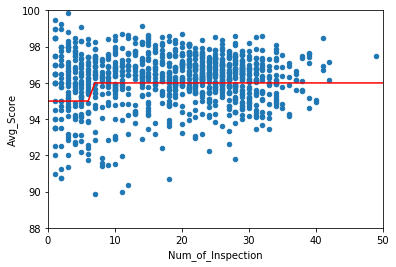

In [24]:
print('Figure 3')
plt = dfnew.plot.scatter(x = 'Num_of_Inspection', y = 'Avg_Score',xlim=(0,50), ylim=(88,100))
plt.plot(np.arange(0,51), pred_score, color = 'red')

#### Next I wanted to confirm the prediction and show more evidence that there is a correlation between the workload in a month and the given evaulations of health inspection workers. So I did so by calculating for the p-value.

In [25]:
outcome_1, predictors_1 = patsy.dmatrices('Avg_Score ~ Num_of_Inspection', dfnew)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Avg_Score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.057
Date:                Sat, 06 Jun 2020   Prob (F-statistic):            0.00268
Time:                        17:15:15   Log-Likelihood:                -1787.5
No. Observations:                 995   AIC:                             3579.
Df Residuals:                     993   BIC:                             3589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            95.9073      0.09

#### Based on the dataset, we can conclude through the data analysis with both the predictions from polyfit and OLS Regression results, that there is a correlation between required inspections per month and evaulations given during inspections. We can see that the prediction with the polyfit outputs an average of 95 if number of inspections is less than 10 and 96 if greater (more workload). While that may not say much, we can see from the scatter plot (figure 3) that generally, there are a lot more varying scores given each month when number of inspections are around 20 or less. Also prediction with OLS resulted in a p-value that is less than 0.01, thus rejecting the null hypothesis and showing substantial evidence that more workload makes inspectors give less accurate scores.

# Ethics & Privacy

There may be some biases in the dataset since it would be limited to one specific region, North Carolina, thus is not exactly representative of all inspection companies or inspections in other state and how their workload is the only factor that reflects the health standards of their city. Most data is granulated and thus provides anonymity for individuals to protect their privacy. 

Data produced may also have an effect on the cities and their restaurants as their city's health standards are being evaulated thus, I removed the city's names and only kept mention that the facilities we worked with is from North Corolina.
There may be another bias in the data based on the city and their living standards. This I was not able to determine from a dataset given to me from my course.

# Conclusion & Discussion


Referring back to the reference links in Background and Prior Work section, one of the solutions proposed by the author is, "One possible remedy: Managers could impose a cap on the maximum number of inspections per day, and rearrange schedules to disperse inspections throughout the week—a maximum of one or two each day rather than three or four." [2]. 
Based on our analysis, this is correct, since our analysis emphasizes that for inspections to be efficient, the maximum number of inspections in a month should be at around 20, which is around one or two each day as suggested. 

In our analysis, we can observe from figure 2 and 3 that generally when given less work, the evaulations are much more dispersed and not necessarily more lenient. Since we can see that the evaluation scores were around 90-100 when workload is around 10-20 inspections in a month and for workload of 20+ inspections, it seems to produce scores that were more clumped around 96. Thus it showed that as inspectors were required more work, they tend to give evaluations that are more similar to their usually evaluations.

This analysis is relevant to society since it should help make our communities become more efficient with health inspection and therefore, reduce food-borne illnesses. Reducing the workload of health inspectors will allow the workers to become more attentive during inspectors and thus give more accurate evaulations of facilities. Though it may be more expensive to reduce workload and hire more workers, it is a necessary step to bringing positive change to our communities.
